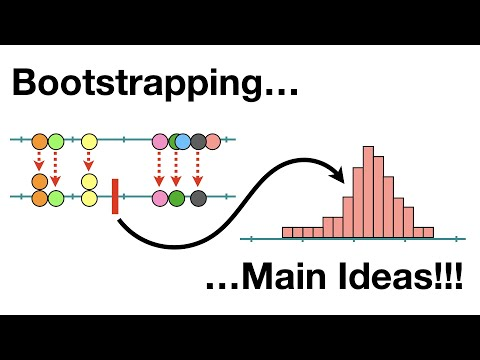

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Notes from the video
- **Sampling with replacement**: randomly selecting data and allowing for duplicates
- the new number line when bootstraping needs to have the same amount of values that the original set contains. Yet not exactly the same values, since it allows for repetition to happen 
    - The new data set created using sampling with replacement so that it had the same number of values as the original data set is called a bootstrapped data set 
        - because the bootstrapped dataset is different from the oringal dataset, we get a different mean than from the original
- **bootstrapping**: the process of creating a bootstrapped data set, then calculating something (such as the mean) and keeping track of the calculations 
- **bootsrapping dataset steps**: 
    1. make a bootstrapped data set
    2. calculate any statistic 
    3.  keep track of that calculation 
    4. repeat steps 1-3 a bunch of times (usually 1,000s of times)
    5. after creating bootstrapped samples, calculating the desired statistics and adding them to the histogram, we end up with a new historgram
        - just by looking at the histogram we can tell what would happen if we redid the original experiment a bunch of times 
    
- because there are some many combinations, bootstrapping usually creates a subset to stimate the full distribution

- **standard error of the mean:** value from the orginal dataset we only need to calculate the standard deviation of the mean distribution obtained in the bootstrapping dataset
    - a 95% **confidence interval**: an interval that cover 95% of the bootstrapped mean 
        - when the confidence interval covers 0, then we can not reject the hypothesis
        
- confidence interval is a type of hypothesis testing
- both standard error and confidence interval can be calculated directly with a formula without having to creat a bootstrapped dataset 
    - but bootstrapping is awesome because we can apply it to ANY statistic to create a histogram of what might happen a bunch of times if we repeated the experiment
    - we can use the histogram given by the bootstrapping to calculate stuff like standard errors and confidence intervals without having to worry whether or not there is a nice fomrula
        - we can use and see the bootstrapping distribution and the confidence interval of any statistic which can help us to interpret the intial results 

**Question 1**

The standard error of the mean refers to the  of the accuracy that the dataset mean has in regards to the actual population mean. While the standard deviation of the distribution bootstrap measures the distribution of all of the points in the data set, while at the same time it shows how much the values of the dataset  deviate from the mean. The main difference is that the standard deviation measures the distribution of the whole dataset, while the standard error focuses only on the accuracy of the sample mean to the estimated population mean.The most distinct idea that the standard deviation can capture the distribution of any statistic in the data set, while the standard error is limited to the mean. 

**Chatbot link:** 
https://chatgpt.com/share/66ff2799-2324-8002-a7e3-dd2da8056918

**Question 2**

How can we use the standard error of the mean to create a 95% confidence interval which covers 95% of the bootstrapped sample means?
1. Create a bootstrapped data set 
2. Calculate the mean of the bootstrapped data set
3. Keep track of those calculations
4. Repeat steps 1 through 3, thousands of times
4. Calculate the standard error for the previous mean considering that it is the only value from the orignal dataset  needed
5. Once having the standard error, calculate the standard deviation of the mean distribution obtained in the bootstrapping dataset
6. Keeping track of this distribution will create something called a 95% confidence interval, which will cover 95% of the bootstrapped mean


**Chatbot summary:**
https://chatgpt.com/share/66ff2799-2324-8002-a7e3-dd2da8056918

**Question 3**

One of the alternative ways to create a 95% bootstrapped CI is by using the percentile method, and in order to do it the right way, the following steps should be completed:
1. First follow all the steps of the bootstrapping method. However stop when it is time to use the standard error. 
2. So after calculating the mean of all the bootstrapped samples, you will need to detrmine the percentiles for a 95% confidence interval 
    - To do that, it is necessary to:
        - Identify the middle 95% of the distribution
        - Identify the lowest interval of the distribution located in the lowest 2.5 percentile (left tail of the histrogram)
        - Identify the highest interval of the distribution located in the largest 2.5% (right tail of the histrogram)
3. In order to calculate the percentiles wihtout doing it manually, use the np.quantile() function
    - In order to find the all of the percentiles needed this function should be defined to locate the percentiles. Such as
        - lowest_percentile=np.quantile(boot_means,0.025)
        - highest_percentile=np-quantile(boot_means,0.975)
    
The function np.quantile() is used because it gives the desired percentiles that are needed to create the 95% bootstrapped CI, of course without the need of knowing or even estimating the standard error. 

**Chatbot link:**
https://chatgpt.com/share/66ff2799-2324-8002-a7e3-dd2da8056918

**Question 4**


Create a code with Chatbot to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have

comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for differnt population parameters (population median)

**Summary Chatbot:**
https://chatgpt.com/share/66ff39db-6190-8002-8e86-a99115380aa5

In [2]:
#Code: 

import numpy as np
import pandas as pd

np.random.seed(42)

population_size = 1000

age = np.random.randint(18, 80, size=population_size)

income = np.random.normal(50000, 15000, size=population_size)

education_levels = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
education = np.random.choice(education_levels, size=population_size, p=[0.3, 0.2, 0.3, 0.15, 0.05])

population_data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Education': education
})

population_data.head()


,Age,Income,Education
0,56,70585.666948,Master
1,69,39833.208605,High School
2,46,67302.978080,Bachelor
3,32,44374.840574,Master
4,60,39587.810697,Associate


In [6]:
#Code to produce a 95% bootstrap confidence interval for a population mean based on a sample 

import numpy as np
import pandas as pd

np.random.seed(42)

population_size = 1000
age = np.random.randint(18, 80, size=population_size)  

income = np.random.normal(50000, 15000, size=population_size)

education_levels = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
education = np.random.choice(education_levels, size=population_size, p=[0.3, 0.2, 0.3, 0.15, 0.05])

population_data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Education': education
})

sample_size = 100  

sample = population_data['Age'].sample(n=sample_size, replace=False)

def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Function to calculate the bootstrap confidence interval for a population mean.

    Parameters:
    - data: The original sample data.
    - num_bootstrap_samples: The number of bootstrap samples to generate.
    - confidence_level: The desired confidence level (default is 0.95 for 95% confidence interval).

    Returns:
    - confidence_interval: The lower and upper bounds of the confidence interval.
    """
    bootstrap_means = []

    for _ in range(num_bootstrap_samples):
        bootstrap_sample = data.sample(n=len(data), replace=True)
        bootstrap_means.append(bootstrap_sample.mean())

    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

ci_lower, ci_upper = bootstrap_confidence_interval(sample)

print(f"95% Bootstrap Confidence Interval for the Mean Age: [{ci_lower:.2f}, {ci_upper:.2f}]")


95% Bootstrap Confidence Interval for the Mean Age: [47.10, 53.51]


- The code above gives the 95% bootstrap CI for the mean of the samples. However, if we wanted to use this same code to produce a 95% bootstrap CI for a different parameter such as median or any other statistic, the only necessary thing to do would be to follow the comments in the code below. 

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

population_size = 1000
age = np.random.randint(18, 80, size=population_size) 
income = np.random.normal(50000, 15000, size=population_size)

education_levels = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
education = np.random.choice(education_levels, size=population_size, p=[0.3, 0.2, 0.3, 0.15, 0.05])

population_data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Education': education
})

#Step 1: Define the sample size of the data set that you are analyzing
sample_size = 100  # Define sample size here

sample = population_data['Age'].sample(n=sample_size, replace=False)

# Step 2: Define a function to make bootstrapping and calculate the CI for the desired statistic
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Function to calculate the bootstrap confidence interval for a population mean.

    Parameters:
    - data: The original sample data.
    - num_bootstrap_samples: The number of bootstrap samples to generate.
    - confidence_level: The desired confidence level (default is 0.95 for 95% confidence interval).

    Returns:
    - confidence_interval: The lower and upper bounds of the confidence interval.
    """
    # List to store the means of each bootstrap sample
    bootstrap_means = []

    # Perform bootstrapping
    for _ in range(num_bootstrap_samples):
        # Resample with replacement from the original sample
        bootstrap_sample = data.sample(n=len(data), replace=True)
        # Calculate the mean of the bootstrap sample
        bootstrap_means.append(bootstrap_sample.mean())

    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Step 3: Set the different functions needed to calculate the 95% CI for the statistic desired
    #For example, if wanting to calculate the medina, then the function np.quantile or np.percentile() should be called 
ci_lower, ci_upper = bootstrap_confidence_interval(sample)

# Display the CI
print(f"95% Bootstrap Confidence Interval for the Mean Age: [{ci_lower:.2f}, {ci_upper:.2f}]")


**Question 5**


It is of extreme importance to distringuish between the role of the population parameter and the sample statistic because they represent different cocnepts in the confidence interval. For starters, a population parameter are the statistics that you are looking for, sch as the mean, median, among other aspects that describe the entire population. While the sample statistics are are values hwich are obtained by analyzing the sample data. The sample statistics differ from the population parameter since it varies depending on the changes made to each of the samples contained in the bootstrapped data. 

So some of the aspects for why we distringuish are:
- with the population parameter we make inferences from the data 
- with the sample sttistic we use the inferences 
- the variability from each sample, as stated above, which is given by the smaple statistic
- if wanting to look for uncertainity we should use the population parameter

**Chatbot summary:** 
https://chatgpt.com/share/66ff42dd-b384-8002-8a9b-04b2e568006c


**Question 6.1** 

Bootstrapping is the process of creating a bootstrapped data set, then calculating a statistical sample (such as the mean), keeping track of the calculations and visualizing the distribution of the results. 

**Question 6.2** 

The main purpose of bootstraping is to simulate what a sample repeated multiple (thousands) of times would genereate to the different statistics. Moreover, bootstrapping is used to illustrate the distribution of the given resampling. Additionally, we can use and see the bootstrapping distribution and the confidence interval of any statistic which can help us to interpret the intial results. 

**Question 6.3** 

Bootstrapping is the process through which you can calculate and obatian the confidence interval. And by taking into account what the confidence interval includes, then you can determine whereer the hypothesis is plausible or not. This due to the fact that the confidence interval is a way of hypothesis testing. So, if the confidence interval cover the value 0, then you can not reject the hypothesis. 

**Question 7**

The fact that the confidence interval overlaps zero means that zero could be potentially a possible value for the actual difference based on the data, which therefore suggest that there is not enough proves to discard the hypothesis. 

There is a variety of different ways in which the conclusion could be different and the null hypothesis could be rejected. However in this context, the most evident one is to narrow the CI in order to exclude zero from it. 

**Chatbot summary:**
https://chatgpt.com/share/66ff4a2b-3b1c-8002-bf9d-b1eeaf47a4a4

In [ ]:
**Question 8**
Give evidence or whether th vaccine is effective or not 
- visual presentation giving some initial insight into the comparison of interest
- quantitative analysis of the data and an explanation of the method and purpose of this method
- conclusion regarding a null hypothesis of no effect after analyzing the data with your methodology 
- clarity of your documentation, code and writen repor 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the random seed for reproducibility
np.random.seed(42)

# Creating the DataFrame
data = {
    "PatientID": range(1, 11),
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84],
}

df = pd.DataFrame(data)


*Problem Introduction:*

On this question, the main purpose is to evaluate whether or not the new vaccine that AliTech has created is effecctive. 
In this case, since we are trying to prove either the vaccine is effective or not, I will create a hypothesized statement. My Null hypothesis states:
"There is no effect (imporvement) of the vaccine on the  on health from the people that take it". 
So all of the following information, calculations and code will be aiming to conclude if I can reject the hypothesis, or if I can prove the hypothesis. 

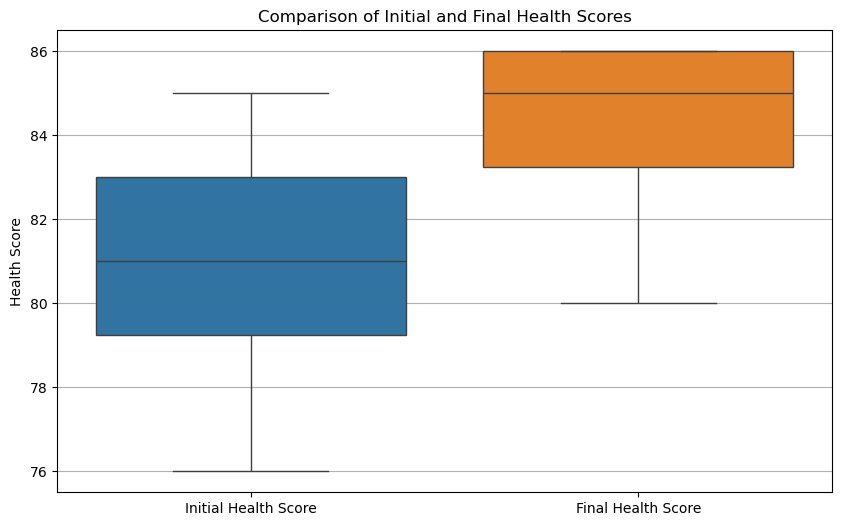

Observed Mean Difference: 3.3
95% Confidence Interval: [0.7 5.5]


In [7]:
# Visual presentation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.grid(axis='y')
plt.show()

df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

n_iterations = 1000
boot_means = []
for _ in range(n_iterations):
    boot_sample = np.random.choice(df['ScoreDifference'], size=len(df), replace=True)
    boot_means.append(np.mean(boot_sample))

observed_mean_diff = np.mean(df['ScoreDifference'])

conf_interval = np.percentile(boot_means, [2.5, 97.5])

print(f'Observed Mean Difference: {observed_mean_diff}')
print(f'95% Confidence Interval: {conf_interval}')

*Data Visualization:*

First of all, the image above is a box plot which shows the intial health score (blue box) and the final health score(orange box), which was affected by the appliance of the vaccine in the different patients. However, this box plot is not refering to the orignal dataset, but rather to a hypothethical sitaution in which the original data set was repeated 1,000 times, with some variation in each sample. 
Just by looking at the image, I can clearly see how the final helath scores after using the vaccine were much better than the intial ones, which helps me to start thinking that it is plausible that the vaccine works, and thus I can reject the hypothesis later on. 

*Quantitivate analysis:*

On the code presented above there are different relevant factors shown. By perfoming bootstrapping I was able to illustrate the differences in the health score before and after the vaccine was used. In order to obtain the differences I had to simulate the repeated sampling thousands of times, in order to be able to generealize and calculate the mean difference. 
The output of the code is that the mean difference is of 3.3, which indicates that the average of the health socres increased on average 3.3 points from the original sample. Moreover, there is also displayed the 95% CI giving the values [0.7 5.5], as seen before in this task. Those two values represent the actual mean difference. So we can see that the mean difference is really distruted along the bootstrapped dataset. 
The visual illustration of the box plots help to get an easier understanding of what is supposed to happen if the vaccine was applied thousands of times, to thousands of people. 
The code itself is simple:
- it starts with plotting the box plot, and is able to do this by defining the figure size, the x and y variables, and the different quartile ranges from both variables.
- then it continues to calculate the scores difference by substracting the final scores with the intial scores, whose result is representing the effect of the vaccine (in this case an improvement)
- then it is using that outcome and simulating that it happens 1,000 times, which is basically were the main bootstrapping happens
- afterwards, it calculates the obersved mean, and the confidence interval from the bootstrapped dataset. 

*Findings and Discussion:*
    
After analyzing the results presented, specially on the box plot, I can conclude that the AliTech new vaccine is useful and acutal improves the health of the patients that use them. I can support this conclusion by saying that due to the fact that the 95% confidence interval does NOT cover 0, since it goes from 0.7 all the way to 5.5, then there is not evidence to reject the null hypothesis, and conclude that the finding is that the vaccine does produce an effect. Also, by looking at the box plot it is more than clear that the vaccine produced something that helped the patients, just by considering that the lowest outlier 
Although it has been proven that the vaccine does geneate a positive effect on the patients, the sample does not consider many factors or is not analyzing some factors that could influence the conclusion and the knowledge of who are the group of people that are enjoying more the benefit. 